In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uncovering-wage-disparities-in-pennsylvania-s-hi/2013_Salaries__Pennsylvania_State_System_of_Higher_Education.csv


In [2]:
data = pd.read_csv("/kaggle/input/uncovering-wage-disparities-in-pennsylvania-s-hi/2013_Salaries__Pennsylvania_State_System_of_Higher_Education.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 12632 non-null  int64 
 1   Name                  12632 non-null  object
 2   Base Pay              12632 non-null  object
 3   University or Office  12632 non-null  object
 4   Position              12632 non-null  object
dtypes: int64(1), object(4)
memory usage: 493.6+ KB


In [5]:
data.head()

,index,Name,Base Pay,University or Office,Position
0,0,"Driscoll, Michael Allan",$275000,Indiana,University President
1,1,"Weisenstein, Greg R",$241935,West Chester,University President
2,2,"Welsh, Marcia L",$230000,East Stroudsburg,University President
3,3,"Norton, Cheryl J.",$225000,Slippery Rock,University President
4,4,"Wollman, Julie E.",$225000,Edinboro,University President


In [4]:
data["first_name"] = data["Name"].str.split(",", expand=True)[1]
data["middle_name"] = data["first_name"].str.split(" ", expand=True)[2]
data["last_name"] = data["Name"].str.split(",", expand=True)[0]
data["first_name"] = data["first_name"].str.split(" ", expand=True)[1]
data.drop(columns=["Name"], inplace=True)

data["Base Pay"] = data["Base Pay"].str.replace("$","", regex=True)
data["Base Pay"] = data["Base Pay"].astype({"Base Pay": "float64"})

data.head()

,index,Base Pay,University or Office,Position,first_name,middle_name,last_name
0,0,275000.0,Indiana,University President,Michael,Allan,Driscoll
1,1,241935.0,West Chester,University President,Greg,R,Weisenstein
2,2,230000.0,East Stroudsburg,University President,Marcia,L,Welsh
3,3,225000.0,Slippery Rock,University President,Cheryl,J.,Norton
4,4,225000.0,Edinboro,University President,Julie,E.,Wollman


In [7]:
data["Position"].value_counts()

Assistant Professor                   1196
Associate Professor                   1167
Professor                             1077
Instructor                             851
Custodial Worker 1                     432
                                      ... 
Dir Student Activities                   1
Dir-Greek Life & Student Org             1
Asst Dean for Stud Development           1
Asst to the VP for Student Affairs       1
Chancellor                               1
Name: Position, Length: 3315, dtype: int64

In [26]:
data["University or Office"].value_counts()

West Chester                1628
Indiana                     1501
Bloomsburg                  1096
Millersville                1022
Kutztown                     990
Slippery Rock                909
Shippensburg                 889
California                   884
Edinboro                     806
Clarion                      740
East Stroudsburg             719
Lock Haven                   566
Mansfield                    439
Cheyney                      287
Office of the Chancellor     156
Name: University or Office, dtype: int64

In [7]:
locations = data["University or Office"].value_counts().index

pay_by_location = pd.DataFrame(columns=list(locations))

for loca in locations:
    pay_by_location[loca] = data[data["University or Office"]==loca]["Base Pay"].describe()

pay_by_location

,West Chester,Indiana,Bloomsburg,Millersville,Kutztown,Slippery Rock,Shippensburg,California,Edinboro,Clarion,East Stroudsburg,Lock Haven,Mansfield,Cheyney,Office of the Chancellor
count,1628.000000,1501.000000,1096.000000,1022.000000,990.000000,909.000000,889.000000,884.000000,806.000000,740.000000,719.000000,566.000000,439.000000,287.000000,156.000000
mean,55178.412776,60435.730846,56145.716241,54092.442270,58357.909091,59639.678768,59179.559055,54780.910633,57438.013648,57534.781081,58942.125174,59552.683746,54497.610478,55316.965157,77908.282051
std,29976.622021,29514.424079,29721.213707,30515.382941,27712.691886,29093.892904,29600.901604,29537.803172,29361.914417,30327.695984,30121.129934,28212.548933,29136.496373,28653.666798,38058.490612
min,1344.000000,2464.000000,1411.000000,1373.000000,1245.000000,4480.000000,3731.000000,2491.000000,1254.000000,11199.000000,2464.000000,4335.000000,2240.000000,7445.000000,30416.000000
25%,32372.000000,38044.000000,34328.000000,31022.000000,36499.000000,35071.000000,35511.000000,32372.000000,35071.000000,34801.000000,34262.000000,35641.250000,33277.500000,35511.000000,51736.000000
50%,47142.500000,51856.000000,49387.000000,47297.500000,52249.500000,55810.000000,54000.000000,48343.500000,50660.000000,51736.000000,52390.000000,56245.000000,47035.000000,48489.000000,73228.000000
75%,76661.000000,82193.000000,74791.000000,76616.000000,76616.000000,78531.000000,78531.000000,76661.000000,76661.000000,76661.000000,78367.000000,78398.250000,74930.500000,72983.500000,90129.000000
max,241935.000000,275000.000000,207197.000000,222100.000000,218956.000000,225000.000000,206196.000000,200820.000000,225000.000000,220000.000000,230000.000000,220000.000000,198956.000000,202430.000000,327500.000000


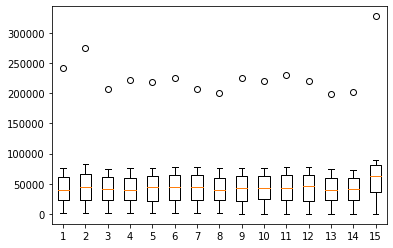

In [27]:
plt.boxplot(pay_by_location)
plt.show()

In [45]:
positions = data["Position"].value_counts().index

position_by_location = pd.DataFrame(columns=list(locations))
summary_position = pd.DataFrame(columns=list(locations))

for loca in locations:
    position_by_location[loca] = data[data["University or Office"]==loca]["Position"].value_counts()
    
    summary_position[loca] = position_by_location[loca] / position_by_location[loca].sum()*100
    
summary_position = summary_position[summary_position >= 1 ]
    
summary_position = summary_position.transpose()


In [59]:
summary_position["Instructor"].isnull()

West Chester                False
Indiana                     False
Bloomsburg                  False
Millersville                False
Kutztown                    False
Slippery Rock               False
Shippensburg                False
California                  False
Edinboro                     True
Clarion                     False
East Stroudsburg             True
Lock Haven                  False
Mansfield                    True
Cheyney                     False
Office of the Chancellor     True
Name: Instructor, dtype: bool

<AxesSubplot:>

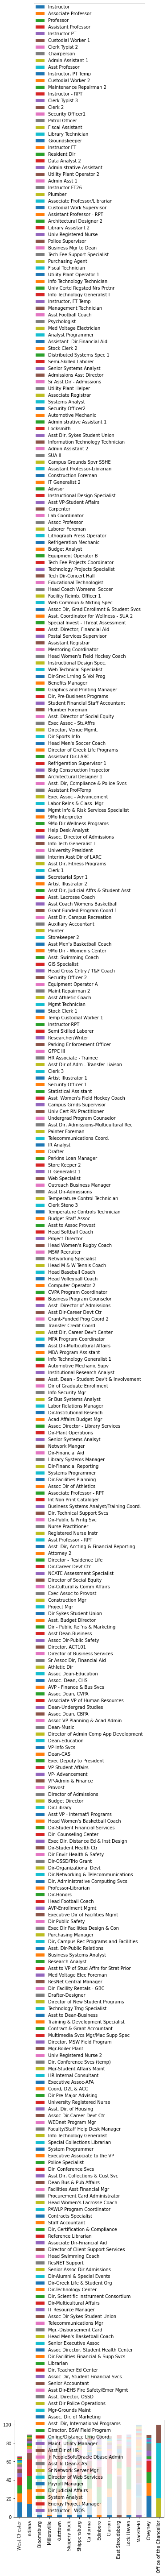

In [30]:


summary_position[summary_position>1].plot.bar(stacked=True)
